# BUAN 670 AB - Data Mining

## Assignment 8  - Due Friday June 4, 2021 at 11:59 pm   ( 5 points in total) 

#### Note : Submit .ipynb (this) file to the blackboard. Name your .ipynb file as “Yourname_Assignment8.ipynb" before submitting.

While working on the assignment;
- Use your judgement
- State your assumptions (what do you understand)
- Solve the problem

Good luck!

In [1]:
# Import required packages for this chapter
from pathlib import Path
import warnings

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

import matplotlib.pylab as plt
from sklearn import metrics
from dmba import plotDecisionTree, gainsChart, liftChart
from dmba import classificationSummary, regressionSummary

%matplotlib inline

## Problem 9.1 Competitive Auctions on eBay.com. (Classification Trees)

The file _eBayAuctions.csv_ contains information on 1972 auctions that transacted on eBay.com during May–June 2004. The goal
is to use these data to build a model that will classify auctions as competitive or noncompetitive. A _competitive auction_ is defined as an auction with at least two bids placed on the item auctioned. The data include variables that describe the item (auction category), the seller (his/her eBay rating), and the auction terms that the seller selected (auction duration, opening price, currency, day-of-week of auction close). In addition, we have the price at which the auction closed. The task is to predict whether or not the auction will be competitive.

__Data Preprocessing.__ Convert variable _Duration_ into a categorical variable. Split the
data into training (60%) and validation (40%) datasets.

In [2]:
# Load the data
ebay_df = pd.read_csv('eBayAuctions.csv')
ebay_df.dtypes
# convert categorical variables into indicator and drop the first column of each of them

ebay_df = pd.get_dummies(ebay_df, prefix_sep='_', drop_first=True,columns=['Category','currency','endDay'])
ebay_df.dtypes

sellerRating                       int64
Duration                           int64
ClosePrice                       float64
OpenPrice                        float64
Competitive?                       int64
Category_Automotive                uint8
Category_Books                     uint8
Category_Business/Industrial       uint8
Category_Clothing/Accessories      uint8
Category_Coins/Stamps              uint8
Category_Collectibles              uint8
Category_Computer                  uint8
Category_Electronics               uint8
Category_EverythingElse            uint8
Category_Health/Beauty             uint8
Category_Home/Garden               uint8
Category_Jewelry                   uint8
Category_Music/Movie/Game          uint8
Category_Photography               uint8
Category_Pottery/Glass             uint8
Category_SportingGoods             uint8
Category_Toys/Hobbies              uint8
currency_GBP                       uint8
currency_US                        uint8
endDay_Mon      

In [3]:
# remove question mark from response name
ebay_df.rename(columns = {'Competitive?':'Competitive'}, inplace = True)

# convert variable Duration to categorical data type
ebay_df['Duration']= ebay_df.Duration.astype('category')
ebay_df.dtypes
# Separate out preditors and outcome variable 
X = ebay_df.drop('Competitive', axis=1)
y = ebay_df['Competitive']


In [4]:
# partition the data into training (60%) and validation (40%) sets. use random_state=1 for reproducibility of results
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

__9.1.a.__ Fit a classification tree using all predictors. To avoid overfitting, set the minimum number of records in a terminal node to 50 and the maximum tree depth to 7. Write down the results in terms of rules. (_Note:_ If you had to slightly reduce the
number of predictors due to software limitations, or for clarity of presentation, which would be a good variable to choose?)

In [5]:
# fit the tree
clf = DecisionTreeClassifier(min_samples_split=50)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",metrics.accuracy_score(y_test, y_pred))


Accuracy 0.8200253485424588


__9.1.b.__ Is this model practical for predicting the outcome of a new auction?

__Answer:__ It is not a practical model for predicting the outcome of a new auction



__9.1.c.__ Describe the interesting and uninteresting information that these rules provide.

__Answer__ The interesting information of these rules involves the seller rating. The rule indicates that the auctions with high open and close price that tend to transact, are associated with low seller ratings. The uninteresting information that these rules provide is the auctions with low close prices,relative to open prices tend not to be competitive. 

__9.1.d.__ Fit another classification tree (using a tree with a minimum number of records per terminal node = 50 and maximum depth = 7), this time only with predictors that can be used for predicting the outcome of a new auction. Describe the resulting
tree in terms of rules. Make sure to report the smallest set of rules required for classification.

In [6]:

# Separate out preditors and outcome variable 
X = ebay_df.drop(['endDay_Mon','endDay_Sat','endDay_Sun','endDay_Thu','endDay_Tue','endDay_Wed','Competitive'], axis=1)
y = ebay_df['Competitive']


In [7]:
# Select only those variables which can be used for predicting the outcome of new auction.
X.head()
# Create a new dataframe with predictors


sellerRating Duration  ClosePrice  OpenPrice  Category_Automotive  \
0          3249        5        0.01       0.01                    0   
1          3249        5        0.01       0.01                    0   
2          3249        5        0.01       0.01                    0   
3          3249        5        0.01       0.01                    0   
4          3249        5        0.01       0.01                    0   

   Category_Books  Category_Business/Industrial  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   Category_Clothing/Accessories  Category_Coins/Stamps  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   Category_Collectibles  ...  Category_Health/Beauty  Category_Home/Garden  \
0                      0  ...                       0                     0   
1                      0  ...                       0                     0   
2                      0  ...                       0                     0   
3                      0  ...                       0                     0   
4                      0  ...                       0                     0   

   Category_Jewelry  Category_Music/Movie/Game  Category_Photography  \
0                 0                          1                     0   
1                 0                          1                     0   
2                 0                          1                     0   
3                 0                          1                     0   
4                 0                          1                     0   

   Category_Pottery/Glass  Category_SportingGoods  Category_Toys/Hobbies  \
0                       0                       0                      0   
1                       0                       0                      0   
2                       0                       0                      0   
3                       0                       0                      0   
4                       0                       0                      0   

   currency_GBP  currency_US  
0             0            1  
1             0            1  
2             0            1  
3             0            1  
4             0            1  

[5 rows x 23 columns]

In [8]:
# separate out the predictors and response variable


# partition the data into training (60%) and validation (40%) sets. Set random_state=1 for reproducibility of results


# fit the tree

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
clf = DecisionTreeClassifier(min_samples_split=50)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8339670468948035


Set of rules

If (OpenPrice <= 3.615) then class = 1

If (OpenPrice > 3.615) and (sellerRating <= 601.5) then class = 1

If (OpenPrice > 3.615) and (sellerRating > 601.5) then class = 0

__9.1.e.__ Plot the resulting tree on a scatter plot: Use the two axes for the two best (quantitative) predictors. Each auction will appear as a point, with coordinates corresponding to its values on those two predictors. Use different colors or symbols
to separate competitive and noncompetitive auctions. Draw lines (you can sketch these by hand or use Python) at the values that create splits. Does this splitting seem reasonable with respect to the meaning of the two predictors? Does it seem to do
a good job of separating the two classes?

<AxesSubplot:xlabel='sellerRating', ylabel='OpenPrice'>

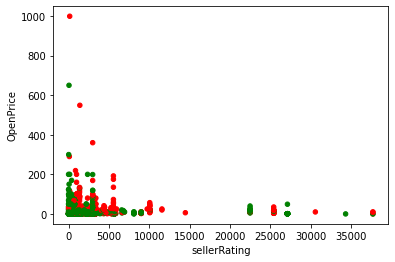

In [9]:
colors = { 0: 'red',1:'green'}
ebay_df.plot.scatter(x = 'sellerRating', y = 'OpenPrice',c=ebay_df['Competitive'].apply(lambda x: colors[x]))





The splitting points are located way down in the lower left corner so the scatterplot does not reveal much to answer the question. We could do a log transform, or restrict the scatterplot to the smaller values.

In [10]:
# apply log transformation on the variables OpenPrice and sellerRating
train_df = x_train.copy()
train_df['Competitive'] = y_train
train_df['log_OpenPrice'] = np.log(train_df['OpenPrice'])
train_df['log_sellerRating'] = np.log(train_df['sellerRating'])

C:\Users\2099365\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='log_sellerRating', ylabel='log_OpenPrice'>

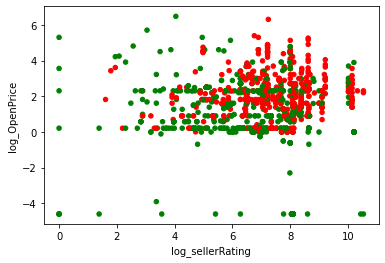

In [11]:
# plot sellerRating vs. OpenPrice 


colors = { 0: 'red',1:'green'}
train_df.plot.scatter(x = 'log_sellerRating', y = 'log_OpenPrice',c=train_df['Competitive'].apply(lambda x: colors[x]))





Although it is hard to see a clear separation between the competitive and noncompetitive auctions on the scatter plot, we see a set of competitive auctions with opening price > 10 held by sellers with rating < 1000. This is surprising, because we would expect higher seller ratings to be associated with a higher chance of competitive auctions. We also see that the bulk of auctions with opening price < $1 or so are competitive, and this is not surprising (lower opening bids attract bidders).

__9.1.f.__ Examine the lift chart and the confusion matrix for the tree. What can you say about the predictive performance of this model?

In [13]:
# predicted classes


# predicted probabilities for validation set


# put it together in a data frame



rows = []
print()
for i in range(len(y_test)):
    rows.append([y_test.tolist()[0],y_prob[i][0],y_prob[i][1],y_pred[i]])
df1 = pd.DataFrame(rows, columns=["Actual", "P(0)","P(1)","Predicted"])
df1


Actual      P(0)      P(1)  Predicted
0         0  0.194444  0.805556          1
1         0  0.000000  1.000000          1
2         0  0.000000  1.000000          1
3         0  0.500000  0.500000          0
4         0  0.000000  1.000000          1
..      ...       ...       ...        ...
784       0  0.000000  1.000000          1
785       0  0.933333  0.066667          0
786       0  0.500000  0.500000          0
787       0  0.111111  0.888889          1
788       0  0.933333  0.066667          0

[789 rows x 4 columns]

In [15]:
# confusion matrices for training and validation sets
print("Training set:")
print(metrics.confusion_matrix(y_train, clf.predict(x_train)))

print("validation set:")
print(metrics.confusion_matrix(y_test,y_pred))




Training set:
[[508  28]
 [107 540]]
validation set:
[[320  50]
 [ 81 338]]


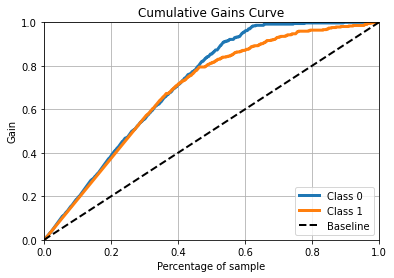

In [16]:
# lift chart for validation set
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, y_prob)
plt.show()


__9.1.g.__ Based on this last tree, what can you conclude from these data about the chances of an auction obtaining at least two bids and its relationship to the auction settings set by the seller (duration, opening price, ending day, currency)? What would you recommend for a seller as the strategy that will most likely lead to a competitive auction?

__Answer__ We could find that the opening price is an important factor controlled by the seller. Lower opening price could attract more bidders.

## Problem 9.3 Predicting Prices of Used Cars (Regression Trees). 

The file _ToyotaCorolla.csv_ contains the data on used cars (Toyota Corolla) on sale during late summer of 2004 in the Netherlands. It has 1436 records containing details on 38 attributes, including Price, Age, Kilometers, HP, and other specifications. The goal is to predict the price of a used Toyota Corolla based on its specifications. (The example in Section 9.7 is a subset of this dataset).

__Data Preprocessing.__ Split the data into training (60%), and validation (40%) datasets.

__9.3.a.__ Run a full-grown regression tree (RT) with outcome variable Price and predictors Age_08_04, KM, Fuel_Type (first convert to dummies), HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar. Set random_state=1.

__9.3.a.i.__ Which appear to be the three or four most important car specifications for predicting the car’s price?

In [17]:
# Load the data
car_df = pd.read_csv('ToyotaCorolla.csv')

# Select the required columns
columns = ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 
           'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 
           'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 
           'Sport_Model', 'Tow_Bar']

car_df = car_df[columns]

# Convert Fuel_Type to dummy variables
car_df = pd.get_dummies(car_df, drop_first=True,columns=['Fuel_Type'])

# Make sure that the result is as expected
car_df.head()

Price  Age_08_04     KM  HP  Automatic  Doors  Quarterly_Tax  \
0  13500         23  46986  90          0      3            210   
1  13750         23  72937  90          0      3            210   
2  13950         24  41711  90          0      3            210   
3  14950         26  48000  90          0      3            210   
4  13750         30  38500  90          0      3            210   

   Mfr_Guarantee  Guarantee_Period  Airco  Automatic_airco  CD_Player  \
0              0                 3      0                0          0   
1              0                 3      1                0          1   
2              1                 3      0                0          0   
3              1                 3      0                0          0   
4              1                 3      1                0          0   

   Powered_Windows  Sport_Model  Tow_Bar  Fuel_Type_Diesel  Fuel_Type_Petrol  
0                1            0        0                 1                 0  
1                0            0        0                 1                 0  
2                0            0        0                 1                 0  
3                0            0        0                 1                 0  
4                1            0        0                 1                 0

In [18]:
# separate out predictors and outcome variable
x = car_df.drop('Price',axis=1)
y = car_df.Price
# partition the data into training (60%) and validiation (40%). Set random_state=1 for reproducibility of results 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)
print(x_train.shape)
print(x_test.shape)

(861, 16)
(575, 16)


In [19]:
# setting random state will ensure that the same tree is produced every time

tree = DecisionTreeRegressor()
tree = clf.fit(x_train,y_train)
y_pred = tree.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.08


In [20]:
# Variable importance
importance = clf.feature_importances_
column = x.columns.tolist()
data = []
for i,k in enumerate(importance):
    data.append([column[i],k])
df1 = pd.DataFrame(data, columns=['Feature','Importance'])
df1

Feature  Importance
0          Age_08_04    0.331330
1                 KM    0.431339
2                 HP    0.082097
3          Automatic    0.000000
4              Doors    0.000000
5      Quarterly_Tax    0.046575
6      Mfr_Guarantee    0.000000
7   Guarantee_Period    0.019459
8              Airco    0.036797
9    Automatic_airco    0.000000
10         CD_Player    0.020397
11   Powered_Windows    0.032006
12       Sport_Model    0.000000
13           Tow_Bar    0.000000
14  Fuel_Type_Diesel    0.000000
15  Fuel_Type_Petrol    0.000000

From the regression tree it appears that the most important car specifications to predict the car's price are Age_08_04 (Age in months as of August 2004), HP (Horse Power), KM (accumulated kilometers on odometer) and Automatic_airco (Automatic Airconditioning(Yes=1, No=0)).

__Note:__ It has been pointed out that there is a value in the cc variable - 16,000 - that is probably a data input error. The solutions have been prepared without correcting this error, but a solution that includes correcting this error to 1600 would also be fine. (The data could also be used as a small illustration or exercise of data prep and cleaning.)

__9.3.a.ii.__ Compare the prediction errors of the training and validation sets by examining their RMS error and by plotting the two boxplots. How does the predictive performance of the validation set compare to the training set? Why does this occur?

In [21]:
# error report for training and validation sets
print("Training set:")
regressionSummary(y_train, clf.predict(x_train))

print("validation set:")
regressionSummary(y_test, y_pred)


Training set:

Regression statistics

                      Mean Error (ME) : 213.1370
       Root Mean Squared Error (RMSE) : 1611.0456
            Mean Absolute Error (MAE) : 1018.1870
          Mean Percentage Error (MPE) : 0.3022
Mean Absolute Percentage Error (MAPE) : 9.3611
validation set:

Regression statistics

                      Mean Error (ME) : 163.9530
       Root Mean Squared Error (RMSE) : 1508.2237
            Mean Absolute Error (MAE) : 1082.0817
          Mean Percentage Error (MPE) : -0.0119
Mean Absolute Percentage Error (MAPE) : 10.5946


The RMSE of the training set is 0 since the tree is as complex as it can be and fully predicts every record. The RMSE of the validation set, which was not involved in the overfitting, is about 1500.

__9.3.a.iii.__ How might we achieve better validation predictive performance at the expense of training performance?

__Answer__ If we wanted to get predictions in a training set that are not equal to the actual prices we would want to experiment with making the training sample size smaller.

__9.3.a.iv.__ Create a smaller tree by using GridSearchCV() with cv=5 to find a fine-tuned tree. Compared to the full-grown tree, what is the predictive performance on the validation set?

In [22]:
# Before doing full grid search, try a tree of depth = 5
# smaller tree

param_grid = {
    'max_depth': [5,10,20], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(random_state=1), 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(x_train,y_train)
print('Initial parameters: ', gridSearch.best_params_)


Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [23]:
# error report for training and validation sets

# error report for training and validation sets
print("Training set:")
regressionSummary(y_train, gridSearch.predict(x_train))

print("validation set:")
regressionSummary(y_test, gridSearch.predict(x_test))




Training set:

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 970.2529
            Mean Absolute Error (MAE) : 667.0256
          Mean Percentage Error (MPE) : -0.7572
Mean Absolute Percentage Error (MAPE) : 6.3719
validation set:

Regression statistics

                      Mean Error (ME) : -2.2553
       Root Mean Squared Error (RMSE) : 1285.4829
            Mean Absolute Error (MAE) : 974.5614
          Mean Percentage Error (MPE) : -1.2322
Mean Absolute Percentage Error (MAPE) : 9.6461


In [24]:
# user grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(random_state=1), 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(x_train, y_train)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.004, 0.005, 
                              0.006, 0.007], 
    'min_samples_split': [17, 18, 19, 20, 21, 22, 23], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(random_state=1), 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(x_train, y_train)
print('Improved parameters: ', gridSearch.best_params_)

optRegTree = gridSearch.best_estimator_

importanceRT = pd.DataFrame({'features': x_train.columns, 
                             'importance': optRegTree.feature_importances_})

print('Tree has {} nodes'.format(optRegTree.tree_.node_count))
# plotDecisionTree(optRegTree, feature_names=x_train.columns, rotate=True)

Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 20}
Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_split': 21}
Tree has 61 nodes


In [25]:
# error report for training and validation sets
print("Training set:")
regressionSummary(y_train, optRegTree.predict(x_train))

print("validation set:")
regressionSummary(y_test, optRegTree.predict(x_test))


Training set:

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1100.9381
            Mean Absolute Error (MAE) : 799.4101
          Mean Percentage Error (MPE) : -1.0081
Mean Absolute Percentage Error (MAPE) : 7.6852
validation set:

Regression statistics

                      Mean Error (ME) : 23.7040
       Root Mean Squared Error (RMSE) : 1240.2015
            Mean Absolute Error (MAE) : 950.0088
          Mean Percentage Error (MPE) : -1.0616
Mean Absolute Percentage Error (MAPE) : 9.5168


__9.3.b.__ Let us see the effect of turning the price variable into a categorical variable. First, create a new variable that categorizes price into 20 bins. Now repartition the data keeping Binned_Price instead of Price. Run a classification tree with the same set of input variables as in the RT, and with Binned_Price as the output variable. As in the less deep regression tree, create a smaller tree by using GridSearchCV() with cv=5 to find a fine-tuned tree.

In [26]:
# categorical price
car_df['Price']= car_df.Price.astype('category')

# separate out predictors and response
x = car_df.drop('Price',axis=1)
y = car_df.Price

# partition the data into training (60%) and validation (40%). Set random_state=1 for the reproducibility of results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

__9.3.b.i.__ Compare the smaller tree generated by the CT with the smaller tree generated by RT. Are they different? (Look at structure, the top predictors, size of tree, etc.) Why?

In [27]:
# use grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridSearch.fit(x_train, y_train)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007], 
    'min_samples_split': [8, 9, 10, 11, 12, 13], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridSearch.fit(x_train, y_train)
print('Improved parameters: ', gridSearch.best_params_)

optClassTree = gridSearch.best_estimator_
importanceCT = pd.DataFrame({'features': x_train.columns, 
                             'importance': optClassTree.feature_importances_})


Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 50}
Improved parameters:  {'max_depth': 4, 'min_impurity_decrease': 0, 'min_samples_split': 8}


In [28]:
# plot the tree
# CT has 57 nodes, compared to RT, which has 61



In [30]:
# error report for trainig and validation sets


# error report for training and validation sets
print("Training set:")
# regressionSummary(y_train, optRegTree.predict(x_train))
print(classificationSummary(y_train, optClassTree.predict(x_train)))

print("validation set:")
print(classificationSummary(y_test, optClassTree.predict(x_test)))



Training set:
Confusion Matrix (Accuracy 0.1800)

       Prediction
Actual   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

       Prediction
Actual   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

The accuracies for the shallow classification tree are 0.57 and 0.48.

The cross validation results suggest to pick a maximum tree depth of 5. At this depth, the accuracy on the training (0.57) and validation sets (0.48) are comparable.

In [31]:
# variable importance for regression tree
importance = optRegTree.feature_importances_
column = x.columns.tolist()
data = []
for i,v in enumerate(importance):
    data.append([column[i],v])
df1 = pd.DataFrame(data, columns=['Feature','Importance'])
df1

Feature  Importance
0          Age_08_04    0.894346
1                 KM    0.021789
2                 HP    0.052586
3          Automatic    0.000759
4              Doors    0.000000
5      Quarterly_Tax    0.004307
6      Mfr_Guarantee    0.001392
7   Guarantee_Period    0.000553
8              Airco    0.003301
9    Automatic_airco    0.014338
10         CD_Player    0.000000
11   Powered_Windows    0.003692
12       Sport_Model    0.002936
13           Tow_Bar    0.000000
14  Fuel_Type_Diesel    0.000000
15  Fuel_Type_Petrol    0.000000

In [32]:
# variable importance for classification tree
importance = optClassTree.feature_importances_
column = x.columns.tolist()
data = []
for i,v in enumerate(importance):
    data.append([column[i],v])
df1 = pd.DataFrame(data, columns=['Feature','Importance'])
df1

Feature  Importance
0          Age_08_04    0.532543
1                 KM    0.246246
2                 HP    0.040652
3          Automatic    0.000000
4              Doors    0.000000
5      Quarterly_Tax    0.043167
6      Mfr_Guarantee    0.000000
7   Guarantee_Period    0.034877
8              Airco    0.065954
9    Automatic_airco    0.000000
10         CD_Player    0.036560
11   Powered_Windows    0.000000
12       Sport_Model    0.000000
13           Tow_Bar    0.000000
14  Fuel_Type_Diesel    0.000000
15  Fuel_Type_Petrol    0.000000

__9.3.b.ii.__ Predict the price, using the smaller RT and CT, of a used Toyota Corolla with the specifications listed in Table 9.10.

In [34]:
# used car
data = [[77,117000,110,0,5,100,0,3,1,0,0,0,0,1,0,1]]
newcar = pd.DataFrame(data, columns=column)
newcar_RT = optRegTree.predict(newcar)
newcar_CT = optClassTree.predict(newcar)
print(f"RT: {newcar_RT}")
print(f"CT: {newcar_CT}")

RT: [7125.]
CT: [7950]


__9.3.b.iii.__ Compare the predictions in terms of the predictors that were used, the magnitude of the difference between the two predictions, and the advantages and disadvantages of the two methods.

__Answer:__ Our predictions for the two models were very simmilar. Our binned model returned a whole number while the full model returned a more “accurate” price. Both models had comparable accuracy, but the full regression seemed to be better trained. However, when considering the the overall accuracy range and the car sale market both models would be considered good enough for most used car sales markets.